# ChatGPT for better or for worse?


### **<u>Intro</u>**:
ChatGPT has been the headline in the news when it comes to Artificial Intelligence for a couple of months now. Since then, people have been using ChatGPT to assist in everyday tasks, from topics as complicated as passing exams from law and business school, to personal topics such as providing a workout plan based on your physique, ChatGPT can do it all. On the other hand, the power of ChatGPT lies in the hands of the person asking the question and how it is being asked. Some argue that it is being used for the worst reasons such as doing homework for students, putting people out of work, and is even being said by scientists that it has the potential to push humanity to extinction.  

Therefore, the question is,  

<mark>*are there more positive or more negative views of ChatGPT in the media?*</mark>

In this project, we will dive into looking at discussion boards from Reddit posts while also looking at heaadlines from articles from The New York Times and NewsAPI to determine which words are affiliated with ChatGPT. The relevance of this question about ChatGPT is completely up to date since it continues to be updated and expanded upon in order to make it more efficient and “smart.” Even though information about ChatGPT is still being reported, no one has asked nor shown graphically the question of how society overall views ChatGPT. In particular, I will look at the top 100 relevant posts from r/news, r/technology, and r/teachers in Reddit and I will focus on the top 100 relevant posts in Twitter.

### **<u>Data</u>**:
The following API's were used for researching headlines related to ChatGPT:  

<u>Reddit API</u>: looked at the most recent posts from subreddits "r/technology", "r/Teachers", and "r/worldnews." The reason I looked in the "r/Teachers" subreddit to see how common plagiarizm was in schools. The reason I looked in "r/technology" and "r/worldnews" was to inspect how ChatGPT has been used.   

<u>The New York Times API</u>: looked at most recent articles related to ChatGPT.

<u>NewsAPI</u>: looked at most relevant articles related to ChatGPT from reliables sources.  
**NOTE**: NewsAPI is an easy to use API that provides historic and current news articles published by over 80,000 worldwide sources.  



### **<u>Process</u>**:
1. Cleaning Data obtained from each API:  
      •Acquire post/ article headings and convert into Data frame  
      •Removing Punctuation  
      •Tokenization  
      •Remove Stopwords  
      •Lematization    
      •Word Frequencies  
      •Visualization  
      •Analysis  
2. Then combine findings from each API into one data frame and analyze visually common word usage.
3. Finally, Vader Sentiment Analysis will be performed to determine overall positive or negative sentiment.
4. Conclusion 



   

### Installing and importing packages:

In [78]:
!pip install wordcloud
!pip install psaw
!pip install spacy
!python -m spacy download en_core_web_sm 
!python -m spacy download en_core_web_lg
!pip install praw  
!pip install pynytimes 
!pip install newsapi-python
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.5 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 791.9 kB/s eta 0:00:0000:0100:13
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
# Library imports
import praw
import tweepy
import pandas as pd 
from pynytimes import NYTAPI
from newsapi import NewsApiClient
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import spacy
import numpy as np
from string import punctuation
from collections import Counter
from itertools import chain
import plotly.express as px
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# creds is python file with stored API keys in order to hide passwords
import creds


## REDDIT 

In [3]:
reddit = praw.Reddit(client_id= creds.reddit_client_id,
                     client_secret= creds.reddit_client_secret,
                     password= creds.reddit_password,
                     user_agent= creds.reddit_user_agent, 
                     username= creds.reddit_username
                    )

In [4]:
tech_subreddit = reddit.subreddit('technology')
news_subreddit = reddit.subreddit('news')
worl_subreddit = reddit.subreddit('worldnews')

In [5]:
# Specify the search query and the number of posts you want to retrieve
search_query = 'ChatGPT'
# Search for posts using the specified query
subreddits= ['technology','Teachers','worldnews']
id_info= [] 
title = []
heading =[]
time = [] 
for subreddit_name in subreddits:
    posts = reddit.subreddit(subreddit_name).search(search_query, limit=1000, sort='new')

    # Iterate through the search results and print the title of each post
    for post in posts:
        id_info.append(post.id)
        title.append(post.subreddit)
        heading.append(post.title)
        time.append(post.created_utc)


In [6]:
reddit_df = pd.DataFrame(
    {
        'ID': id_info,
        'Subreddit': title,
        'Heading': heading,
        'Time': time,
    })
# to keep for later
orig_reddit_df = pd.DataFrame(
    {
        'Heading': heading,
    })
reddit_df.head()

,ID,Subreddit,Heading,Time
0,14lwoe6,technology,ChatGPT maker OpenAI faces a lawsuit over how ...,1.688018e+09
1,14lgiu3,technology,OpenAI’s ChatGPT app can now search the web — ...,1.687975e+09
2,14jpffh,technology,Congress sets limits on staff ChatGPT use,1.687805e+09
3,14jpbqp,technology,"U.S. House IT Department Warns Lawmakers, Staf...",1.687805e+09
4,14jlryg,technology,WinGPT is a new ChatGPT app for your ancient W...,1.687797e+09


Note: in row 204, I ran into issues with removing the character that looks like an Apostrophe in the word "China's" but this is not an apostrophe. The ASCII code for a comma is 39 while this character's ASCII code is 8217. The following function will take this into account

### Removing Punctuation

In [7]:
def punctAndlower(column):
    for char in punctuation:
        column = column.replace(char,"").casefold()
    
    column = column.replace("openai","")
    # The following 4 lines of code removes characters that looks may appear identical to some punctuation
    # but are not. For example There's one character in the data set that looks like an
    # apostrophe but is not. 
    # This looks at ASCII of char and convert it to character
    column = column.replace(chr(8217),"")
    column = column.replace(chr(8212),"")
    column = column.replace(chr(34),"")
    column = column.replace(chr(39),"")
    column = column.replace("'","")
    column = column.replace('"',"")
    column = column.replace('-',"")
    
    # The following lines are to remove redundant words
    column = column.replace('ai',"")
    column = column.replace("artificial","")
    column = column.replace("intelligence","")
    column = column.replace("chatgpt","")
    column = column.replace("chat","")
    column = column.replace("gpt","")
    return column

reddit_df['Heading'] = reddit_df['Heading'].apply(punctAndlower)
reddit_df

,ID,Subreddit,Heading,Time
0,14lwoe6,technology,maker faces a lawsuit over how it used peopl...,1.688018e+09
1,14lgiu3,technology,s app can now search the web but only via bing,1.687975e+09
2,14jpffh,technology,congress sets limits on staff use,1.687805e+09
3,14jpbqp,technology,us house it department warns lawmakers staff a...,1.687805e+09
4,14jlryg,technology,win is a new app for your ancient windows 31 ...,1.687797e+09
...,...,...,...,...
450,12awh3g,worldnews,germany in principle could block if needed d...,1.680553e+09
451,11vfkxm,worldnews,huawei has replaced thousands of usbanned part...,1.679214e+09
452,10a55p4,worldnews,chinas internet users finding creative uses for,1.673544e+09
453,10879ln,worldnews,microsoft in talks to invest 10 bln in owner ...,1.673349e+09


### Tokenization

In [8]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anonymous/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/anonymous/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anonymous/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
reddit_df['Heading'] = reddit_df['Heading'].apply(word_tokenize)
reddit_df

,ID,Subreddit,Heading,Time
0,14lwoe6,technology,"[maker, faces, a, lawsuit, over, how, it, used...",1.688018e+09
1,14lgiu3,technology,"[s, app, can, now, search, the, web, but, only...",1.687975e+09
2,14jpffh,technology,"[congress, sets, limits, on, staff, use]",1.687805e+09
3,14jpbqp,technology,"[us, house, it, department, warns, lawmakers, ...",1.687805e+09
4,14jlryg,technology,"[win, is, a, new, app, for, your, ancient, win...",1.687797e+09
...,...,...,...,...
450,12awh3g,worldnews,"[germany, in, principle, could, block, if, nee...",1.680553e+09
451,11vfkxm,worldnews,"[huawei, has, replaced, thousands, of, usbanne...",1.679214e+09
452,10a55p4,worldnews,"[chinas, internet, users, finding, creative, u...",1.673544e+09
453,10879ln,worldnews,"[microsoft, in, talks, to, invest, 10, bln, in...",1.673349e+09


### Remove  stop words 

In [10]:
# no_stops = [word for word in tokens if word not in stopwords.words('english')]
def remove_stops(tokens):
    no_stops = []
    for word in tokens:
        if word not in stopwords.words('english'):
            no_stops.append(word)
    return no_stops

reddit_df['Heading'] = reddit_df['Heading'].apply(remove_stops)
reddit_df

,ID,Subreddit,Heading,Time
0,14lwoe6,technology,"[maker, faces, lawsuit, used, peoples, data]",1.688018e+09
1,14lgiu3,technology,"[app, search, web, via, bing]",1.687975e+09
2,14jpffh,technology,"[congress, sets, limits, staff, use]",1.687805e+09
3,14jpbqp,technology,"[us, house, department, warns, lawmakers, staf...",1.687805e+09
4,14jlryg,technology,"[win, new, app, ancient, windows, 31, pc, dust...",1.687797e+09
...,...,...,...,...
450,12awh3g,worldnews,"[germany, principle, could, block, needed, dat...",1.680553e+09
451,11vfkxm,worldnews,"[huawei, replaced, thousands, usbanned, parts,...",1.679214e+09
452,10a55p4,worldnews,"[chinas, internet, users, finding, creative, u...",1.673544e+09
453,10879ln,worldnews,"[microsoft, talks, invest, 10, bln, owner, sem...",1.673349e+09


### Lemmatization

In [11]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "textcat"])

In [12]:
def lemmatize(tokens):
    words = ' '.join(tokens)
    doc = nlp(words)
    return [token.lemma_ for token in doc]

In [13]:
reddit_df['Heading'] = reddit_df['Heading'].apply(lemmatize)
reddit_df

,ID,Subreddit,Heading,Time
0,14lwoe6,technology,"[maker, face, lawsuit, use, people, datum]",1.688018e+09
1,14lgiu3,technology,"[app, search, web, via, bing]",1.687975e+09
2,14jpffh,technology,"[congress, set, limit, staff, use]",1.687805e+09
3,14jpbqp,technology,"[us, house, department, warn, lawmaker, staff,...",1.687805e+09
4,14jlryg,technology,"[win, new, app, ancient, window, 31, pc, dust,...",1.687797e+09
...,...,...,...,...
450,12awh3g,worldnews,"[germany, principle, could, block, need, datum...",1.680553e+09
451,11vfkxm,worldnews,"[huawei, replace, thousand, usbanned, part, pr...",1.679214e+09
452,10a55p4,worldnews,"[chinas, internet, user, find, creative, use]",1.673544e+09
453,10879ln,worldnews,"[microsoft, talk, invest, 10, bln, owner, sema...",1.673349e+09


might want to remove AI and/or chatGPT from lists, Also maybe remove numbers

### Word Frequencies

In [14]:
def word_freq(df):
    combined_list = list(chain.from_iterable(df['Heading']))
    freq = Counter(combined_list)
    freq=dict(freq)
    df_freq = pd.DataFrame.from_dict(data=freq, orient='index', columns=['Frequency'])
    df_freq = df_freq.rename_axis('Word').reset_index().sort_values(by='Frequency',ascending=False)
    return df_freq

reddit_freq = word_freq(reddit_df)
reddit_freq

,Word,Frequency
3,use,77
216,student,38
57,write,35
786,teacher,27
121,bot,23
...,...,...
231,50,1
720,hr,1
722,bust,1
723,paste,1


### Visualization w/ Barplot

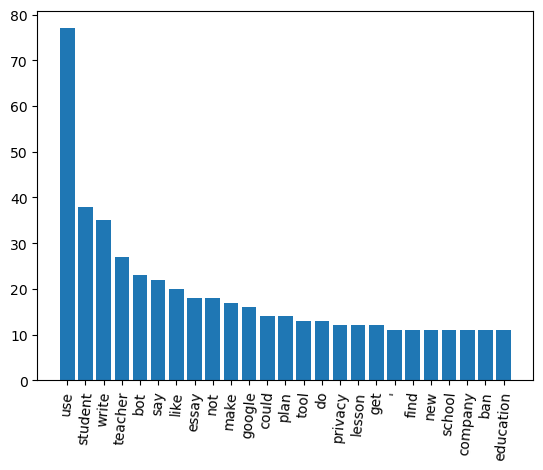

In [22]:
def bar_graph(df):
    subset = df.head(25)
    plt.bar(subset['Word'], subset['Frequency'])
    plt.xticks(rotation = 85)
    plt.show()

bar_graph(reddit_freq)

### WordCloud

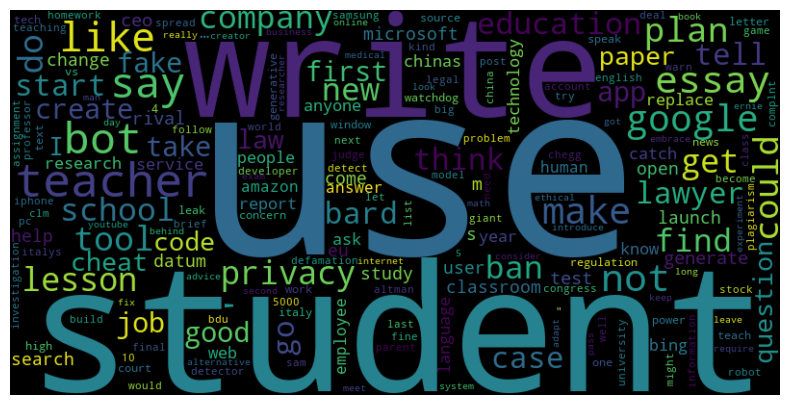

In [23]:

def df_to_WordCloud(df):
    # Create a dictionary from DataFrame columns
    word_frequencies = dict(zip(df['Word'], df['Frequency']))

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_frequencies)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
df_to_WordCloud(reddit_freq)

## NY TIMES EDA

Quick Note: when calling "nyt.article_search(query="ChatGPT")" other articles not relating to ChatGPT is returned, therfore we sort through articles with headlines that include ChatGPT, hence the "headline":['ChatGPT'] line

In [24]:
nyt = NYTAPI(creds.NYTIMES_KEY, parse_dates=True)

query="ChatGPT"

GPT_articles = nyt.article_search(query=query, dates=None, options={"sort": "newest", "headline":['ChatGPT']}, results=1000)

/Users/anonymous/anaconda3/lib/python3.10/site-packages/pynytimes/helpers/article_search.py:33: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


In [25]:
ny_id = []
published = []
section = []
lead_ph = []
for article in GPT_articles:
    ny_id.append(article['_id'])
    published.append(article['pub_date'])
    section.append(article['section_name'])
    lead_ph.append(article['lead_paragraph'])



In [26]:
nyt_df = pd.DataFrame(
    {
        "ID": ny_id,
        'Published': published,
        'Section': section,
        'Heading': lead_ph,
    })
orig_nyt_df = pd.DataFrame(
    {
        'Heading': lead_ph,
    })
nyt_df.head()

,ID,Published,Section,Heading
0,nyt://article/3c07e070-e683-5b80-86c5-cc97853a...,2023-06-27 14:23:40+00:00,Style,"When did Marc Jacobs, erstwhile downtown darli..."
1,nyt://article/7d62a740-6d73-5ed3-b3d0-ecc97905...,2023-06-22 18:59:03+00:00,New York,"A Manhattan judge on Thursday imposed a $5,000..."
2,nyt://article/57824af6-cdc9-564d-a341-f78a4f45...,2023-06-08 07:00:19+00:00,New York,"As the court hearing in Manhattan began, the l..."
3,nyt://article/f369de14-06de-5d93-9d82-d50644b0...,2023-05-27 14:12:01+00:00,New York,The lawsuit began like so many others: A man n...
4,nyt://article/a3b22cfa-6c81-5121-a48b-c54445e3...,2023-05-25 10:00:02+00:00,Technology,"Welcome back to On Tech: A.I., a pop-up newsle..."


### cleaning the data 

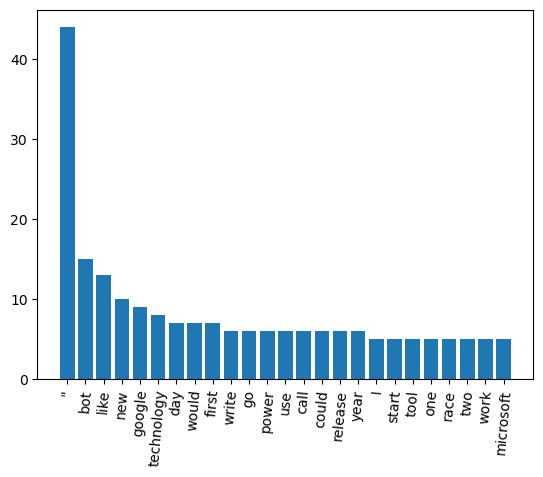

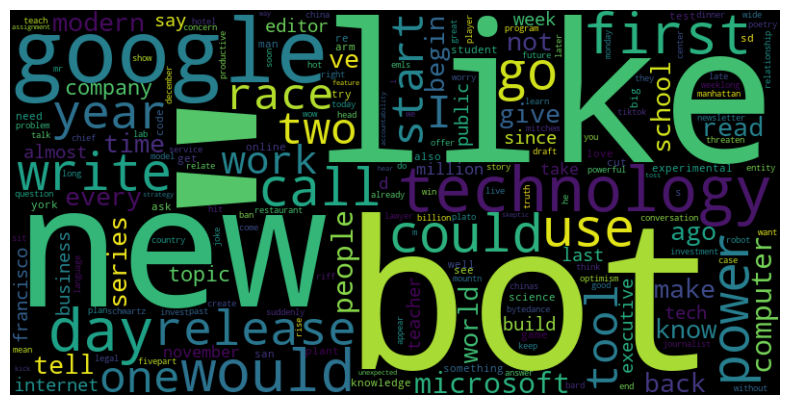

In [27]:
# remove punctuation and lower
nyt_df['Heading'] = nyt_df['Heading'].apply(punctAndlower)

# tokenization
nyt_df['Heading'] = nyt_df['Heading'].apply(word_tokenize)

# remove stop words
nyt_df['Heading'] = nyt_df['Heading'].apply(remove_stops)

# lemmatization
nyt_df['Heading'] = nyt_df['Heading'].apply(lemmatize)

# word frequency
nyt_freq = word_freq(nyt_df)

# bar graph
bar_graph(nyt_freq)

# wordcloud
df_to_WordCloud(nyt_freq)


## NEWS API


In [28]:
newsapi = NewsApiClient(api_key=creds.newsAPI_key)
all_articles = newsapi.get_everything(q='ChatGPT',
                                    sources= 'ars-technica,google-news,wired,business-insider,bbc-news,the-verge,abc-news,time',
                                    #   domains='bbc.co.uk,techcrunch.com',
                                    #   from_param='2017-12-01',
                                    #   to='2017-12-12',
                                      language='en',
                                      sort_by='relevancy',
                                      page=1)

In [29]:
published_at = []
description = []
newsUrl= []
source = []
for article in all_articles['articles']:
    source.append(article['source']['name'])
    published_at.append(article['publishedAt'])
    description.append(article['description'])
    newsUrl.append(article['url'])


In [30]:
newsApi_df = pd.DataFrame(
    {
        "Source": source,
        'Published': published_at,
        'ID': newsUrl,
        'Heading': description,
    })
orig_newsApi_df = pd.DataFrame(
    {
        'Heading': description
    })

newsApi_df.head()

,Source,Published,ID,Heading
0,Wired,2023-06-14T11:00:00Z,https://www.wired.com/story/chatgpt-education-...,The technology can help cut through buzzwordy ...
1,Wired,2023-06-21T06:00:00Z,https://www.wired.com/story/china-chatgpt-oppo...,Chinese entrepreneurs are using AI to start co...
2,Wired,2023-06-08T12:00:00Z,https://www.wired.com/story/chatgpt-google-bar...,"Whether you use ChatGPT, Bard, or Bing, your f..."
3,Wired,2023-05-30T11:00:00Z,https://www.wired.com/story/for-some-autistic-...,The chatbot can help rehearse communication sk...
4,Wired,2023-06-22T16:00:00Z,https://www.wired.com/story/fast-forward-the-l...,"ChatGPT is stoking fears of mass layoffs, but ..."


### cleaning the data

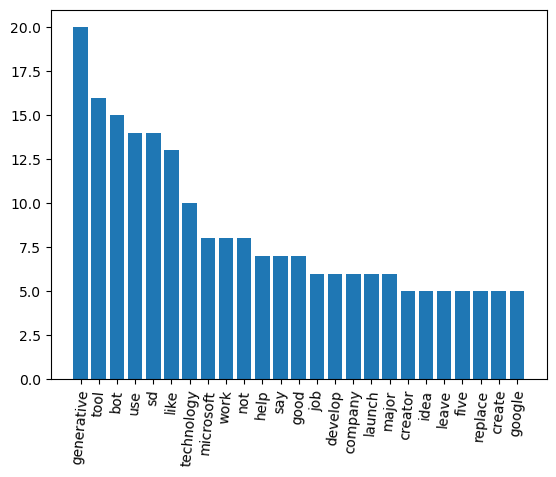

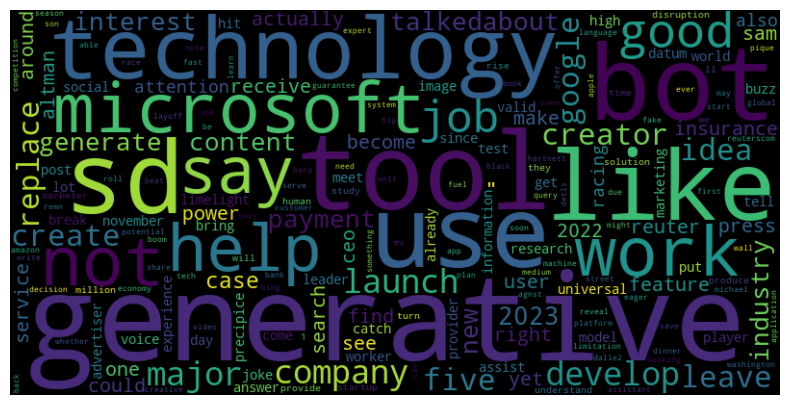

In [31]:
# remove punctuation and lower
newsApi_df['Heading'] = newsApi_df['Heading'].apply(punctAndlower)

# tokenization
newsApi_df['Heading'] = newsApi_df['Heading'].apply(word_tokenize)

# remove stop words
newsApi_df['Heading'] = newsApi_df['Heading'].apply(remove_stops)

# lemmatization
newsApi_df['Heading'] = newsApi_df['Heading'].apply(lemmatize)

# word frequency
newsApi_freq = word_freq(newsApi_df)

# bar graphnewsAPI
bar_graph(newsApi_freq)

# wordcloud
df_to_WordCloud(newsApi_freq)


<u>Analysis:</u>  
looking at the posts/articles obtained from each API gives scattered insights on common words affiliated with ChatGPT. Therefore, combining all of our findings into one dataframe can give us a better census into which words are commonly used with ChatGPT.

## combining all dataframes


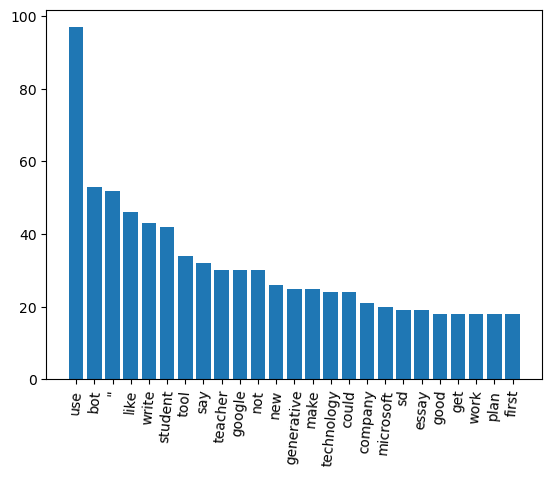

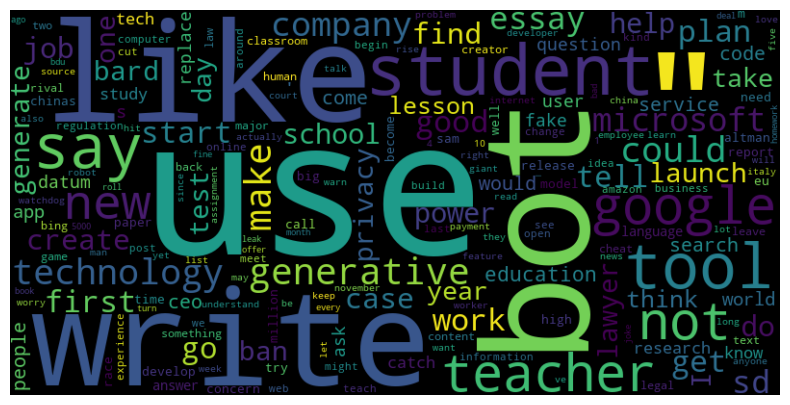

In [32]:

combined_df = pd.concat([reddit_df['Heading'], nyt_df['Heading'], newsApi_df['Heading']],ignore_index=True).to_frame()

# word frequency
combined_freq = word_freq(combined_df)


# bar graph 
bar_graph(combined_freq)

# wordcloud
df_to_WordCloud(combined_freq)

<u>Analysis:</u>  
As you can see, words like "student" and "teacher" were commonly used amoung posts/articles that were analyzed. This can possibly be a bad thing since the word "essay" is also within the top 25 common words used. 

Overall, this does not do the best job with indicating whether or not ChatGPT is viewed as a positive tool or a negative.

To dive a little deeper, we will use the Vader Sentiment Analysis tool and determine if there is a higher ratio between positive or negative sentiments within the posts/articles.  

## Vader sentiment analysis

In [33]:
# combining original dataframes 
orig_combined_df = pd.concat([orig_reddit_df['Heading'], orig_nyt_df['Heading'], orig_newsApi_df['Heading']],ignore_index=True).to_frame()
orig_combined_df

,Heading
0,ChatGPT maker OpenAI faces a lawsuit over how ...
1,OpenAI’s ChatGPT app can now search the web — ...
2,Congress sets limits on staff ChatGPT use
3,"U.S. House IT Department Warns Lawmakers, Staf..."
4,WinGPT is a new ChatGPT app for your ancient W...
...,...
606,"Google revealed a ""top results"" feature that w..."
607,"See if you can outsmart the model, and learn h..."
608,It's becoming clear that AI will likely boost ...
609,Generative AI can already do much of the work ...


In [34]:
# Create an instance of the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis
orig_combined_df['Sentiment Score'] = orig_combined_df['Heading'].apply(analyzer.polarity_scores)
orig_combined_df


,Heading,Sentiment Score
0,ChatGPT maker OpenAI faces a lawsuit over how ...,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp..."
1,OpenAI’s ChatGPT app can now search the web — ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Congress sets limits on staff ChatGPT use,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"U.S. House IT Department Warns Lawmakers, Staf...","{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp..."
4,WinGPT is a new ChatGPT app for your ancient W...,"{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'comp..."
...,...,...
606,"Google revealed a ""top results"" feature that w...","{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp..."
607,"See if you can outsmart the model, and learn h...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
608,It's becoming clear that AI will likely boost ...,"{'neg': 0.066, 'neu': 0.534, 'pos': 0.399, 'co..."
609,Generative AI can already do much of the work ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [35]:
orig_combined_df['Sentiment Score'][0]

{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'compound': -0.2263}

In [36]:
def negative_sentiment(column):
    return column['neg']

def positive_sentiment(column):
    return column['pos']

def neutral_sentiment(column):
    return column['neu']

def compound_sentiment(column):
    return column['compound']

negatives = sum(orig_combined_df['Sentiment Score'].apply(negative_sentiment))
positives = sum(orig_combined_df['Sentiment Score'].apply(positive_sentiment))
neutrals = sum(orig_combined_df['Sentiment Score'].apply(neutral_sentiment))
compounds = sum(orig_combined_df['Sentiment Score'].apply(compound_sentiment))

negative_perc = round(negatives/len(orig_combined_df)*100,2)
positive_perc = round(positives/len(orig_combined_df)*100,2)
neutral_perc = round(neutrals/len(orig_combined_df)*100,2)
compound_perc = round(compounds/len(orig_combined_df),3)

print(f"Out of {len(orig_combined_df)}  headlines...")
print(f"The percentage of positives is {positive_perc}%")
print(f"The percentage of negatives is {negative_perc}%")
print(f"The percentage of neutrals is {neutral_perc}%")
print(f"The overall sentiment is {compound_perc}")






Out of 611  headlines...
The percentage of positives is 7.78%
The percentage of negatives is 6.66%
The percentage of neutrals is 85.56%
The overall sentiment is 0.054


<u>In Conclusion:</u>  
    As you can see, out of the 610 posts/articles analyzed, theres a higher amount of positive sentiment, 7.8% compared to negative sentiment, 6.61%. Since the compound rating was 0.055, this means the overall sentiment is a bit more positve but closer to factual articles since it is closer to 0. In addition, it is fair to say that most of the posts/articles were observed to be neutral with 85.6%, meaning that there was more factual reported articles compared to opinionated reported articles. It makes sense that a good majority of the of the sentiments are neutral since 2 of the API's focus on news sources compared to Reddit, which has more opionated discussion boards.  

Originally, I expected to find negative words affiliated with ChatGPT like dangerous, plagiarism, homework, and tests but instead broader words like fake, lawyer, and essay (which can be an indicator to plagirism) were found. On the other hand, as far as positive comments, I was correct when expecting to see words like power, tool and education. This can stem from the many of educational and efficient uses one can have with ChatGPT. 

For future improvements, since the original data frames contain information related to which news source the article was from (ABC News, Business Insider, GoogleNews, etc), we can dive even deeper to determine which articles had more opinionated articles by looking at each Vader Sentiment score. From there, we can also analyze which common words are found with higher negative sentiment and the same for positive sentiment. 